In [1]:
import numpy as np
import importlib
import get_rho_etc
importlib.reload(get_rho_etc)
from get_rho_etc import *
import matplotlib.pyplot as plt
import sys
sys.path.append('/home/hcleroy/Extra_Module_py')
import formated_matplotlib
import matplotlib.cm as cm
cmap = cm.get_cmap('viridis')
cmap_2 = cm.get_cmap('plasma_r')


/tmp/ipykernel_10476/2714573238.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis')
/tmp/ipykernel_10476/2714573238.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap_2 = cm.get_cmap('plasma_r')


In [2]:
# Common Parameters :
size = 20
Vs = [1.,0.,2.,0.]
Es = [1.,2.]
steep = 30
steeps = [steep for _ in range(4)]
mu = 1.
kab0=1. # !!!!!!!!!!! this is not an adjustable parameter !!!!!!!!!!!!!!!!!
# stochastic matrix parameters :
X0,Xf,n = 0,size,40000 # lower/higher spacial boundary and number of discretizing points
dx = (Xf-X0)/n

Nmu = 50
mumin = 0.
mumax = 10

In [3]:
OD = list()
for mu in np.linspace(0.,mumax,Nmu):
    OD.append([mu,OneD_Phase_sep(Vs,Es,steeps,mu,size,X0,Xf,n)])

In [4]:
for od in OD:
    od[1].compute_rhos()

In [5]:
lambda_left = list()
lambda_right =list()
lambda_left_a = list()
lambda_right_a =list()
for od in OD:
    lambda_left.append(od[1].get_lambda(left=True))
    lambda_right.append(od[1].get_lambda(right=True))
    lambda_left_a.append(od[1].get_analytical_lambda(left=True))
    lambda_right_a.append(od[1].get_analytical_lambda(right=True))
lambda_left = np.array(lambda_left)
lambda_right=np.array(lambda_right)

lambda_left_a = np.array(lambda_left_a)
lambda_right_a=np.array(lambda_right_a)

Text(0.5, 0, 'mu')

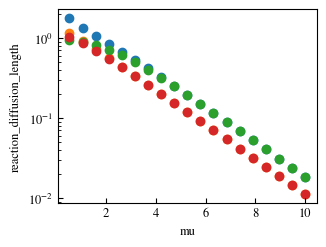

In [163]:
plt.yscale('log')
plt.scatter(np.linspace(0,mumax,Nmu)[1:],1/np.sqrt(abs(lambda_left[1:,0])))
plt.scatter(np.linspace(0,mumax,Nmu)[1:],1/np.sqrt(abs(lambda_right[1:,0])))
plt.scatter(np.linspace(0,mumax,Nmu)[1:],abs(lambda_left_a[1:]))
plt.scatter(np.linspace(0,mumax,Nmu)[1:],abs(lambda_right_a[1:]))
plt.ylabel('reaction_diffusion_length')
plt.xlabel('mu')

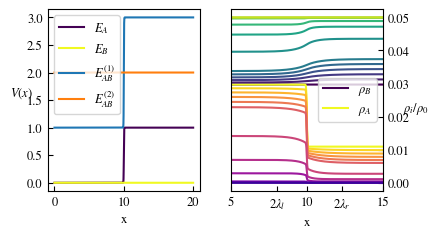

In [6]:
width_mm = 110
height_mm = 60
Index_to_plot = np.array([0,1,2,3,4,5,10,15,20,30,40,49])
width_inches = width_mm / 25.4
height_inches = height_mm / 25.4
fig,ax = plt.subplots(ncols = 2, figsize = (width_inches,height_inches))
num_lines = Index_to_plot.__len__()
i = 0
# Normalize the colormap
norm = plt.Normalize(1, num_lines)
ax[0].plot(OD[0][1].X,OD[0][1].va(OD[0][1].X),label=r'$E_A$',color=cmap(norm(0)))
ax[0].plot(OD[0][1].X,OD[0][1].vb(OD[0][1].X),label=r'$E_B$',color=cmap_2(norm(0)))
ax[0].plot(OD[0][1].X,OD[0][1].vab1(OD[0][1].X),label=r'$E_{AB}^{(1)}$')
ax[0].plot(OD[0][1].X,OD[0][1].vab2(OD[0][1].X),label=r'$E_{AB}^{(2)}$')
ax[0].legend()
for index in Index_to_plot[:]:#range(Nmu):
#index=1
    od = OD[index]

    ax[1].yaxis.set_ticks_position('right')
    ax[1].yaxis.set_label_position('right')
    if i ==0:
        ax[1].plot(od[1].X,od[1].rhob,color=cmap(i/Index_to_plot.__len__()),label=r'$\rho_B$')#,label=f"{od[0]:.1f}")
        ax[1].plot(od[1].X,od[1].rhoa,color=cmap_2(i/Index_to_plot.__len__()),label=r'$\rho_A$')#,label=f"{od[0]:.1f}")
    else :
        ax[1].plot(od[1].X,od[1].rhob,color=cmap(i/Index_to_plot.__len__()))#,label=f"{od[0]:.1f}")
        ax[1].plot(od[1].X,od[1].rhoa,color=cmap_2(i/Index_to_plot.__len__()))#,label=f"{od[0]:.1f}")
    i+=1

ax[0].set_ylabel(r'$V(x)$',rotation=0.)
ax[0].set_xlabel('x')

ax[1].set_ylabel(r'$\rho_i/ \rho_0$',rotation=0.)
ax[1].set_xlabel('x')

ax[1].legend()
#ax[0].set_xlim()
#ax[1].set_xlim(size/2-5*lambda_left_a[0],size/2+5*lambda_right_a[0])
ax[1].set_xlim(5,15)
#ax[1].set_yticks([0.5,1.,1.5])
ax[1].set_xticks([5,10,15,10+2*lambda_right_a[1],10-2*lambda_left_a[1]],[5,10,15,r'$2\lambda_r$',r'$2\lambda_l$'])
#ax[0].set_yticks([0,1.])
#ax[0].set_xticks([40,50,60])

# Create the colorbar
#sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
#sm.set_array([])
#plt.colorbar(sm, ticks=[mumin,mumax], boundaries=range(1, num_lines+1))

#plt.savefig('potential_rho_ooe_2.svg',transparent=True,bbox_inches='tight')

In [7]:
chem_fluxs = list()
diff_fluxs = list()
for i in range(OD.__len__()):
    od = OD[i]
    chem_fluxs.append(od[1].get_chem_fluxs())
    diff_fluxs.append(od[1].get_diff_fluxs())
chem_fluxs = np.array(chem_fluxs)
diff_fluxs = np.array(diff_fluxs)

In [8]:
fig,ax = plt.subplots(ncols=2)
for i in Index_to_plot[:5]:
    od = OD[i]
    ax[0].plot(od[1].X,od[1].get_prod(),color=cmap(i/(Index_to_plot.__len__())))
    ax[1].plot(od[1].X,diff_fluxs[i,0],color=cmap(i/(Index_to_plot.__len__())))
    ax[1].plot(od[1].X,diff_fluxs[i,1],color=cmap_2(i/(Index_to_plot.__len__())))
ax[0].set_xlim(5,15)
ax[1].set_xlim(5,15)
ax[1].yaxis.set_ticks_position('right')
ax[1].yaxis.set_label_position('right')
#ax[1].set_yticks([0.5,1.,1.5])
ax[0].set_xticks([5,10,15,10+2*lambda_right_a[1],10-2*lambda_left_a[1]],[5,10,15,r'$2\lambda_r$',r'$2\lambda_l$'])
ax[1].set_xticks([5,10,15,10+2*lambda_right_a[1],10-2*lambda_left_a[1]],[5,10,15,r'$2\lambda_r$',r'$2\lambda_l$'])
ax[0].set_ylabel(r'$\partial_t p_A|_ \chi$',rotation=0)
ax[1].set_ylabel(r'$\Phi_D$',rotation=0)
ax[0].set_xlabel('X')
ax[1].set_xlabel('X')
#plt.savefig('flux_prod.svg',transparent=True)

In [ ]:
find_closest_index = lambda X,x0 :  np.argmin(np.abs(X-x0))

In [ ]:
chem_fluxs_left = list()
chem_fluxs_right = list()
for i in range(Nmu):
    imin = find_closest_index(od[1].X,10-2*lambda_left_a[1])
    imidle = find_closest_index(od[1].X,10)
    imax = find_closest_index(od[1].X,10+2*lambda_right_a[1])
    od = OD[i]
    chem_fluxs_left.append(np.sum(od[1].dx*chem_fluxs[i][imin:imidle]))
    chem_fluxs_right.append(np.sum(od[1].dx*chem_fluxs[i][imidle:imax]))
chem_fluxs_left= np.array(chem_fluxs_left)
chem_fluxs_right= np.array(chem_fluxs_right)

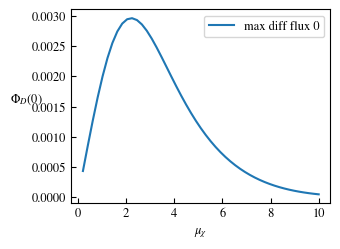

In [ ]:
plt.plot(np.linspace(0,mumax,Nmu)[1:],np.max(abs(diff_fluxs[:,0]),axis=1)[1:],label='max diff flux 0')
#plt.plot(np.linspace(0,mumax,Nmu)[1:],np.max(abs(diff_fluxs[:,1]),axis=1)[1:], label='max diff flux 1')
plt.xlabel(r'$\mu_\chi$')
plt.ylabel(r'$\Phi_D(0)$',rotation=0)
plt.legend()
#plt.savefig('max_flux_diff.svg',transparent=True)

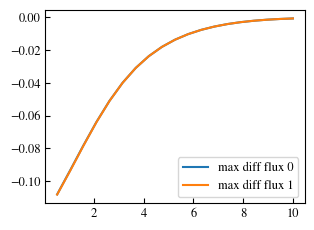

In [175]:
plt.plot(np.linspace(0,mumax,Nmu)[1:],np.max(abs(diff_fluxs[:,0]),axis=1)[1:]/(chem_fluxs_right+chem_fluxs_left)[1:],label='max diff flux 0')
plt.plot(np.linspace(0,mumax,Nmu)[1:],np.max(abs(diff_fluxs[:,1]),axis=1)[1:]/(chem_fluxs_right+chem_fluxs_left)[1:], label='max diff flux 1')
plt.legend()

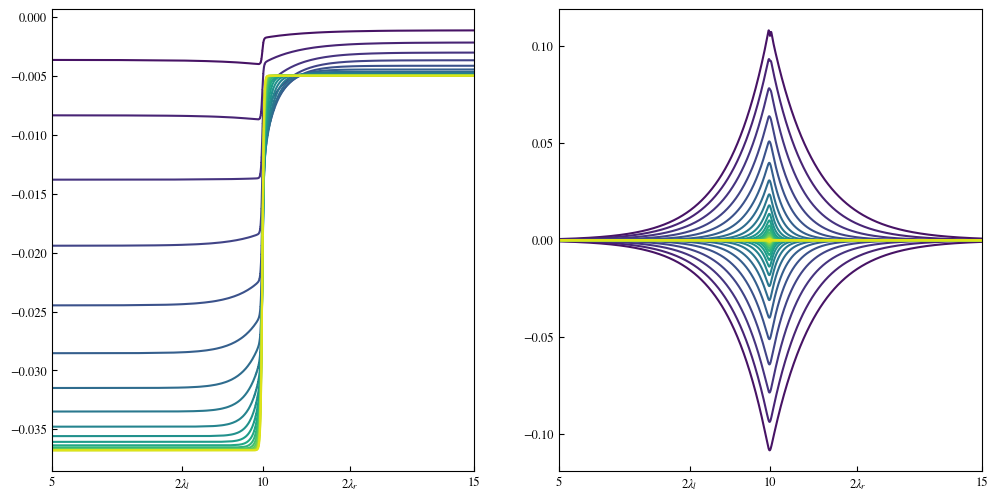

In [172]:
fig,ax = plt.subplots(ncols=2,figsize=(12,6))
for i in range(1,OD.__len__()):
    od = OD[i]
    ax[0].plot(od[1].X,chem_fluxs[i],color=cmap(i/(OD.__len__())))
    ax[1].plot(od[1].X,diff_fluxs[i,0]/(chem_fluxs_right[i]+chem_fluxs_left[i]),color=cmap(i/(OD.__len__())))
    ax[1].plot(od[1].X,diff_fluxs[i,1]/(chem_fluxs_right[i]+chem_fluxs_left[i]),color=cmap(i/(OD.__len__())))
ax[0].set_xlim(5,15)
ax[1].set_xlim(5,15)
#ax[1].set_yticks([0.5,1.,1.5])
ax[0].set_xticks([5,10,15,10+2*lambda_right_a[1],10-2*lambda_left_a[1]],[5,10,15,r'$2\lambda_r$',r'$2\lambda_l$'])
ax[1].set_xticks([5,10,15,10+2*lambda_right_a[1],10-2*lambda_left_a[1]],[5,10,15,r'$2\lambda_r$',r'$2\lambda_l$'])